In [1]:
# ! pip install prophet

In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
sales = pd.read_csv(r"F:\GUVI\Project\Dominos - Predictive Purchase Order System\Cleaned_DATA\Pizza_sales.csv", index_col=0)
ingredients = pd.read_csv(r"F:\GUVI\Project\Dominos - Predictive Purchase Order System\Cleaned_DATA\ingredients_data.csv", index_col=0)

In [4]:
sales.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
ingredients.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [6]:
# Convert order_date to datetime
sales['order_date'] = pd.to_datetime(sales['order_date'], format='mixed')

In [7]:
# Aggregate sales data by day
sales_data = sales.groupby('order_date')['quantity'].sum().reset_index()
sales_data.head()

,order_date,quantity
0,2015-01-01,162
1,2015-01-02,191
2,2015-01-03,99
3,2015-01-04,135
4,2015-01-05,154


In [8]:
sales_data.rename(columns={"order_date": "ds", "quantity":"y"}, inplace=True)

In [9]:
sales_data.head()

,ds,y
0,2015-01-01,162
1,2015-01-02,191
2,2015-01-03,99
3,2015-01-04,135
4,2015-01-05,154


In [10]:
train = sales_data[sales_data['ds'] < '2015-11-01']
test = sales_data[sales_data['ds'] >= '2015-11-01']

In [11]:
train.tail()

,ds,y
294,2015-10-27,120
295,2015-10-28,104
296,2015-10-29,131
297,2015-10-30,166
298,2015-10-31,165


In [12]:
test.tail()

,ds,y
353,2015-12-27,89
354,2015-12-28,102
355,2015-12-29,80
356,2015-12-30,82
357,2015-12-31,178


In [13]:
train.shape

(299, 2)

In [14]:
test.shape

(59, 2)

In [15]:
model = Prophet()
model.fit(train)

23:44:12 - cmdstanpy - INFO - Chain [1] start processing
23:44:12 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
# Predicting on the test set
future_test = test[['ds']].copy()
forecast_test = model.predict(future_test)

In [17]:
forecast_test.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
54,2015-12-27,137.093588,95.915099,146.623098,137.092439,137.094732,-16.104148,-16.104148,-16.104148,-16.104148,-16.104148,-16.104148,0.0,0.0,0.0,120.989440
55,2015-12-28,137.085034,106.138184,156.544362,137.083847,137.086216,-5.959829,-5.959829,-5.959829,-5.959829,-5.959829,-5.959829,0.0,0.0,0.0,131.125205
56,2015-12-29,137.076480,109.649043,160.547992,137.075254,137.077699,-2.187116,-2.187116,-2.187116,-2.187116,-2.187116,-2.187116,0.0,0.0,0.0,134.889364
57,2015-12-30,137.067925,109.068294,163.457762,137.066684,137.069175,-2.177201,-2.177201,-2.177201,-2.177201,-2.177201,-2.177201,0.0,0.0,0.0,134.890725
58,2015-12-31,137.059371,113.774142,167.732870,137.058083,137.060645,3.176983,3.176983,3.176983,3.176983,3.176983,3.176983,0.0,0.0,0.0,140.236354


In [19]:
# Calculate MAPE
mape = mean_absolute_percentage_error(test['y'], forecast_test['yhat'])
print("MAPE on Test Data:", mape)

MAPE on Test Data: 0.1429175490670945


## Prediction future values

In [20]:
model1 = Prophet(changepoint_prior_scale=0.10,seasonality_prior_scale=10.0)
model1.add_seasonality(name='monthly', period=30.5, fourier_order=7)
model1.fit(sales_data)

23:45:31 - cmdstanpy - INFO - Chain [1] start processing
23:45:31 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
# Define the forecast period (next 7 days)
future = model1.make_future_dataframe(periods=7)
forecast = model1.predict(future)

In [22]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,140.007504,124.011920,178.716918,140.007504,140.007504,10.850629,10.850629,10.850629,4.520834,4.520834,4.520834,6.329795,6.329795,6.329795,0.0,0.0,0.0,150.858133
1,2015-01-02,139.999338,127.803825,184.951951,139.999338,139.999338,17.980222,17.980222,17.980222,-0.741544,-0.741544,-0.741544,18.721767,18.721767,18.721767,0.0,0.0,0.0,157.979561
2,2015-01-03,139.991173,114.852486,171.484245,139.991173,139.991173,1.628809,1.628809,1.628809,-2.497403,-2.497403,-2.497403,4.126213,4.126213,4.126213,0.0,0.0,0.0,141.619982
3,2015-01-04,139.983007,97.897631,155.799981,139.983007,139.983007,-14.166206,-14.166206,-14.166206,2.876971,2.876971,2.876971,-17.043178,-17.043178,-17.043178,0.0,0.0,0.0,125.816801
4,2015-01-05,139.974842,116.300868,171.854880,139.974842,139.974842,3.285086,3.285086,3.285086,8.446568,8.446568,8.446568,-5.161481,-5.161481,-5.161481,0.0,0.0,0.0,143.259928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2016-01-03,136.598259,90.668493,146.921272,136.598259,136.598259,-17.784722,-17.784722,-17.784722,-0.741544,-0.741544,-0.741544,-17.043178,-17.043178,-17.043178,0.0,0.0,0.0,118.813537
361,2016-01-04,136.584890,101.889058,156.915416,136.584843,136.584946,-7.658884,-7.658884,-7.658884,-2.497403,-2.497403,-2.497403,-5.161481,-5.161481,-5.161481,0.0,0.0,0.0,128.926006
362,2016-01-05,136.571522,104.737996,163.556141,136.571369,136.571640,-1.454138,-1.454138,-1.454138,2.876971,2.876971,2.876971,-4.331109,-4.331109,-4.331109,0.0,0.0,0.0,135.117384
363,2016-01-06,136.558153,115.242720,169.807493,136.557891,136.558384,5.804562,5.804562,5.804562,8.446568,8.446568,8.446568,-2.642005,-2.642005,-2.642005,0.0,0.0,0.0,142.362716


In [23]:
# Extract the forecasted values for the next week
next_week_forecast = forecast[['ds', 'yhat']].tail(7)
next_week_forecast.columns = ['next_week_date', 'how_many_pizza_wil_sales']
next_week_forecast

,next_week_date,how_many_pizza_wil_sales
358,2016-01-01,159.664735
359,2016-01-02,145.258674
360,2016-01-03,118.813537
361,2016-01-04,128.926006
362,2016-01-05,135.117384
363,2016-01-06,142.362716
364,2016-01-07,150.170289


In [24]:
predicted=forecast[["ds","yhat"]]

In [25]:
predicted

,ds,yhat
0,2015-01-01,150.858133
1,2015-01-02,157.979561
2,2015-01-03,141.619982
3,2015-01-04,125.816801
4,2015-01-05,143.259928
...,...,...
360,2016-01-03,118.813537
361,2016-01-04,128.926006
362,2016-01-05,135.117384
363,2016-01-06,142.362716


In [26]:
actual_sales = sales_data.iloc[0:7]

In [27]:
actual_sales

,ds,y
0,2015-01-01,162
1,2015-01-02,191
2,2015-01-03,99
3,2015-01-04,135
4,2015-01-05,154
5,2015-01-06,184
6,2015-01-07,137


In [28]:
predicted_value = predicted[["yhat"]].tail(7).values

In [29]:
predicted_value

array([[159.66473539],
       [145.25867387],
       [118.81353665],
       [128.92600578],
       [135.11738373],
       [142.36271584],
       [150.17028862]])

In [30]:
actual_value = actual_sales[["y"]].values

In [31]:
actual_value

array([[162],
       [191],
       [ 99],
       [135],
       [154],
       [184],
       [137]], dtype=int64)

In [32]:
# Calculate MAPE
mape = mean_absolute_percentage_error(actual_value, predicted_value)
print("MAPE on Predicted Data:", mape)

MAPE on Predicted Data: 0.1348664789841754


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

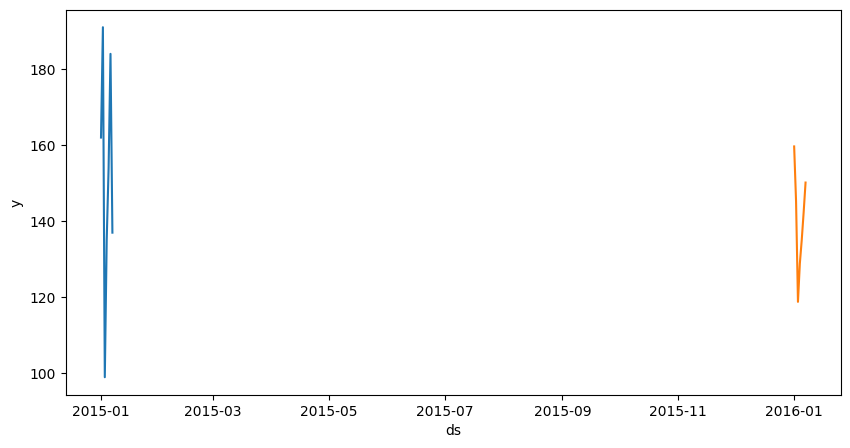

In [35]:
plt.figure(figsize=(10,5))
sns.lineplot(data=actual_sales,x="ds",y="y")
sns.lineplot(data=next_week_forecast,x="next_week_date",y="how_many_pizza_wil_sales")
plt.show()

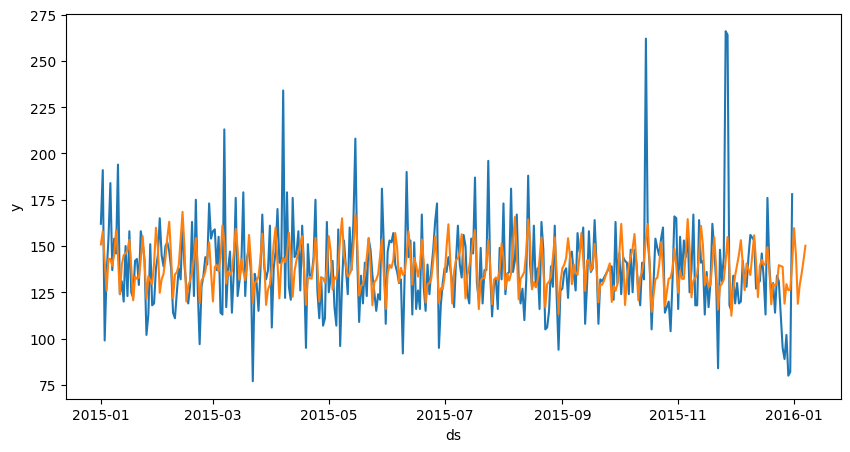

In [36]:
plt.figure(figsize=(10,5))
sns.lineplot(data=sales_data,x="ds",y="y")
sns.lineplot(data=predicted,x="ds",y="yhat")
plt.show()

In [37]:
# Calculate the average daily sales proportion for each pizza type
pizza_type_proportion = sales.groupby('pizza_name_id')['quantity'].sum() / sales['quantity'].sum()

In [38]:
pizza_type_proportion

pizza_name_id
bbq_ckn_l        0.020010
bbq_ckn_m        0.019284
bbq_ckn_s        0.009763
big_meat_s       0.038609
brie_carre_s     0.009884
                   ...   
the_greek_xl     0.011135
the_greek_xxl    0.000565
veggie_veg_l     0.008613
veggie_veg_m     0.012809
veggie_veg_s     0.009360
Name: quantity, Length: 91, dtype: float64

In [39]:
next_week_forecast

,next_week_date,how_many_pizza_wil_sales
358,2016-01-01,159.664735
359,2016-01-02,145.258674
360,2016-01-03,118.813537
361,2016-01-04,128.926006
362,2016-01-05,135.117384
363,2016-01-06,142.362716
364,2016-01-07,150.170289


In [40]:
# Calculate expected sales by pizza type for each day in the forecast
forecasted_pizza_sales = []
for _, row in next_week_forecast.iterrows():
    daily_sales = row['how_many_pizza_wil_sales']
    for pizza_id, proportion in pizza_type_proportion.items():
        forecasted_pizza_sales.append({
            'next_week_date': row['next_week_date'],
            'pizza_name_id': pizza_id,
            'forecasted_sales': daily_sales * proportion
        })

In [41]:
forecasted_pizza_sales_df = pd.DataFrame(forecasted_pizza_sales)
forecasted_pizza_sales_df

,next_week_date,pizza_name_id,forecasted_sales
0,2016-01-01,bbq_ckn_l,3.194969
1,2016-01-01,bbq_ckn_m,3.079023
2,2016-01-01,bbq_ckn_s,1.558836
3,2016-01-01,big_meat_s,6.164488
4,2016-01-01,brie_carre_s,1.578160
...,...,...,...
632,2016-01-07,the_greek_xl,1.672127
633,2016-01-07,the_greek_xxl,0.084818
634,2016-01-07,veggie_veg_l,1.293475
635,2016-01-07,veggie_veg_m,1.923551


In [42]:
# Merge forecasted sales with ingredient quantities
merged_data = pd.merge(forecasted_pizza_sales_df, ingredients, on='pizza_name_id', how='left')

In [43]:
merged_data.head(20)

,next_week_date,pizza_name_id,forecasted_sales,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,2016-01-01,bbq_ckn_l,3.194969,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,2016-01-01,bbq_ckn_l,3.194969,The Barbecue Chicken Pizza,Red Peppers,15.0
2,2016-01-01,bbq_ckn_l,3.194969,The Barbecue Chicken Pizza,Green Peppers,20.0
3,2016-01-01,bbq_ckn_l,3.194969,The Barbecue Chicken Pizza,Tomatoes,30.0
4,2016-01-01,bbq_ckn_l,3.194969,The Barbecue Chicken Pizza,Red Onions,60.0
5,2016-01-01,bbq_ckn_l,3.194969,The Barbecue Chicken Pizza,Barbecue Sauce,15.0
6,2016-01-01,bbq_ckn_m,3.079023,The Barbecue Chicken Pizza,Barbecued Chicken,30.0
7,2016-01-01,bbq_ckn_m,3.079023,The Barbecue Chicken Pizza,Red Peppers,10.0
8,2016-01-01,bbq_ckn_m,3.079023,The Barbecue Chicken Pizza,Green Peppers,15.0
9,2016-01-01,bbq_ckn_m,3.079023,The Barbecue Chicken Pizza,Tomatoes,20.0


In [44]:
# Calculate total ingredient quantities for each ingredient
merged_data['total_ingredient_qty'] = merged_data['forecasted_sales'] * merged_data['Items_Qty_In_Grams']

In [45]:
merged_data.head()

,next_week_date,pizza_name_id,forecasted_sales,pizza_name,pizza_ingredients,Items_Qty_In_Grams,total_ingredient_qty
0,2016-01-01,bbq_ckn_l,3.194969,The Barbecue Chicken Pizza,Barbecued Chicken,40.0,127.798780
1,2016-01-01,bbq_ckn_l,3.194969,The Barbecue Chicken Pizza,Red Peppers,15.0,47.924542
2,2016-01-01,bbq_ckn_l,3.194969,The Barbecue Chicken Pizza,Green Peppers,20.0,63.899390
3,2016-01-01,bbq_ckn_l,3.194969,The Barbecue Chicken Pizza,Tomatoes,30.0,95.849085
4,2016-01-01,bbq_ckn_l,3.194969,The Barbecue Chicken Pizza,Red Onions,60.0,191.698169


In [46]:
# Aggregate to get the total quantity needed for each ingredient
total_ingredient_needs = merged_data.groupby('pizza_ingredients')['total_ingredient_qty'].sum().reset_index()
total_ingredient_needs.columns = ['Ingredient', 'Total_Quantity_needed(Grams)']
total_ingredient_needs

,Ingredient,Total_Quantity_needed(Grams)
0,?duja Salami,811.160148
1,Alfredo Sauce,301.861523
2,Anchovies,840.723396
3,Artichokes,2496.166396
4,Arugula,289.205684
...,...,...
59,Sun-dried Tomatoes,372.655119
60,Thai Sweet Chilli Sauce,1121.623687
61,Thyme,48.448132
62,Tomatoes,11752.725769


In [47]:
# Purchase order creation, listing each ingredient and the quantity needed
purchase_order = total_ingredient_needs
print("Purchase Order:")
purchase_order


Purchase Order:


,Ingredient,Total_Quantity_needed(Grams)
0,?duja Salami,811.160148
1,Alfredo Sauce,301.861523
2,Anchovies,840.723396
3,Artichokes,2496.166396
4,Arugula,289.205684
...,...,...
59,Sun-dried Tomatoes,372.655119
60,Thai Sweet Chilli Sauce,1121.623687
61,Thyme,48.448132
62,Tomatoes,11752.725769


In [48]:
purchase_order.to_csv("purchase_orders.csv")